In [177]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
from sklearn.neighbors import KNeighborsRegressor
from scipy import stats
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [72]:
df = pd.read_csv('/Users/jdobrow/Desktop/Data Science/epicurious-recipes-with-rating-and-nutrition/epi_r.csv')

In [73]:
null_count=df.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [74]:
clean_df = df.copy()

In [75]:
null_calorie_df = clean_df[clean_df.calories.notnull()]
notnull_calorie_df = clean_df[clean_df.calories.isnull()]
neighbors_calories = KNeighborsRegressor(n_neighbors=3, weights='distance')
X=null_calorie_df.drop(['title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y=null_calorie_df['calories']
neighbors_calories.fit(X,Y)
X_test = notnull_calorie_df.drop(['title', 'calories', 'protein', 'fat', 'sodium'], 1)

In [76]:
calorie_nulls = neighbors_calories.predict(X_test.iloc[:])
j = 0
for i in range(len(clean_df)):
    if pd.isnull(clean_df.calories[i]):
        clean_df.calories.iloc[i] = calorie_nulls[j]
        j += 1

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [77]:
null_protein_df = clean_df[clean_df.protein.notnull()]
notnull_protein_df = clean_df[clean_df.protein.isnull()]
neighbors_protein = KNeighborsRegressor(n_neighbors=3, weights='distance')
X=null_protein_df.drop(['title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y=null_protein_df['protein']
neighbors_protein.fit(X,Y)
X_test = notnull_protein_df.drop(['title', 'calories', 'protein', 'fat', 'sodium'], 1)

In [78]:
protein_nulls = neighbors_protein.predict(X_test.iloc[:])
j = 0
for i in range(len(clean_df)):
    if pd.isnull(clean_df.protein[i]):
        clean_df.protein.iloc[i] = protein_nulls[j]
        j += 1

In [79]:
null_fat_df = clean_df[clean_df.fat.notnull()]
notnull_fat_df = clean_df[clean_df.fat.isnull()]
neighbors_fat = KNeighborsRegressor(n_neighbors=3, weights='distance')
X=null_fat_df.drop(['title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y=null_fat_df['fat']
neighbors_fat.fit(X,Y)
X_test = notnull_fat_df.drop(['title', 'calories', 'protein', 'fat', 'sodium'], 1)

In [80]:
fat_nulls = neighbors_fat.predict(X_test.iloc[:])
j = 0
for i in range(len(clean_df)):
    if pd.isnull(clean_df.fat[i]):
        clean_df.fat.iloc[i] = fat_nulls[j]
        j += 1

In [81]:
null_sodium_df = clean_df[clean_df.sodium.notnull()]
notnull_sodium_df = clean_df[clean_df.sodium.isnull()]
neighbors_sodium = KNeighborsRegressor(n_neighbors=3, weights='distance')
X=null_sodium_df.drop(['title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y=null_sodium_df['sodium']
neighbors_sodium.fit(X,Y)
X_test = notnull_sodium_df.drop(['title', 'calories', 'protein', 'fat', 'sodium'], 1)

In [82]:
sodium_nulls = neighbors_sodium.predict(X_test.iloc[:])
j = 0
for i in range(len(clean_df)):
    if pd.isnull(clean_df.sodium[i]):
        clean_df.sodium.iloc[i] = sodium_nulls[j]
        j += 1

In [83]:
clean_df.to_csv('/Users/jdobrow/Desktop/cleandf')

In [87]:
clean_df.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.000000,30.000000,7.000000,559.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.000000,18.000000,23.000000,1439.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.000000,6.000000,7.000000,165.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,461.329676,25.603248,24.353512,724.439795,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.000000,20.000000,32.000000,452.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


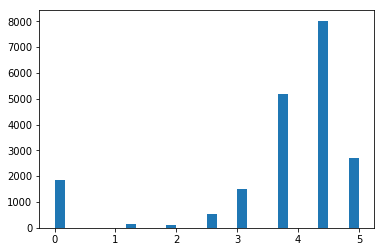

In [102]:
plt.hist(clean_df.rating, bins=30)
plt.show()

In [110]:
# Splitting at the median
rating_split_1 = []
for i in range(len(clean_df)):
    if clean_df.rating[i] >= 4.375:
        rating_split_1.append(1)
    else:
        rating_split_1.append(0)
clean_df['rating_split_1'] = rating_split_1

In [107]:
# Low values separated out
rating_split_2 = []
for i in range(len(clean_df)):
    if clean_df.rating[i] < 2:
        rating_split_2.append(0)
    else:
        rating_split_2.append(1)
clean_df['rating_split_2'] = rating_split_2

In [109]:
# High values separated out
rating_split_3 = []
for i in range(len(clean_df)):
    if clean_df.rating[i] > 4.5:
        rating_split_3.append(1)
    else:
        rating_split_3.append(0)
clean_df['rating_split_3'] = rating_split_3

In [120]:

scipy.stats.chi2_contingency(clean_df.rating_split_1[clean_df['yogurt'] == 1])

ValueError: The internally computed table of expected frequencies has a zero element at (0,).

In [123]:
clean_df.rating_split_1[clean_df['yogurt'] == 1]

528

In [151]:
array = [list(clean_df.turkey[clean_df.rating_split_1 == 1]).count(0), list(clean_df.turkey[clean_df.rating_split_1 == 0]).count(1)]
array

[10444, 162]

In [164]:
best_features = []
for feature in clean_df.columns:
    best_features.append(len(clean_df[clean_df[feature] == 1]))
best_features.sort()
for i in range(34):
    for j in clean_df.columns:
        if len(clean_df[clean_df[j] == 1]) == best_features[1-i]:
            print(j, best_features[1-i])
# This is some bad runtime code but it got the job done.

title 0
rating 0
title 0
rating 0
rating_split_2 17928
rating_split_1 10738
bon appétit 9355
peanut free 8390
soy free 8088
tree nut free 7044
vegetarian 6846
gourmet 6648
kosher 6175
pescatarian 6042
quick & easy 5372
wheat/gluten-free 4906
bake 4413
summer 4151
dessert 3573
dairy free 3206
side 3151
no sugar added 3132
winter 3099
fall 3015
rating_split_3 2719
dinner 2705
sugar conscious 2466
healthy 2351
kidney friendly 2313
onion 2238
tomato 2140
vegetable 2087
sauté 2044
milk/cream 1995
fruit 1958
vegan 1851


In [168]:
good_features = ['calories', 'fat', 'sodium', 'protein', 'bon appétit', 'peanut free', 'tree nut free', 'vegetarian', 'gourmet', 'kosher', 'pescatarian', 
                 'quick & easy', 'wheat/gluten-free', 'bake', 'summer', 'dessert', 'dairy free', 'side', 'no sugar added',
                'winter', 'fall', 'dinner', 'sugar conscious', 'healthy', 'kidney friendly', 'onion', 'tomato',
                'vegetable', 'sauté', 'milk/cream', 'fruit', 'vegan', 'rating_split_1', 'rating_split_2', 'rating_split_3']
feature_df = clean_df[good_features].copy()

In [171]:
feature_df.head()

,calories,fat,sodium,protein,bon appétit,peanut free,tree nut free,vegetarian,gourmet,kosher,...,onion,tomato,vegetable,sauté,milk/cream,fruit,vegan,rating_split_1,rating_split_2,rating_split_3
0,426.000000,7.000000,559.000000,30.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0,1,0
1,403.000000,23.000000,1439.000000,18.000000,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,0
2,165.000000,7.000000,165.000000,6.000000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0
3,461.329676,24.353512,724.439795,25.603248,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1,1,1
4,547.000000,32.000000,452.000000,20.000000,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0


In [185]:
svr = SVR()
X = feature_df.drop(['rating_split_1', 'rating_split_2', 'rating_split_3'], 1).sample(frac=0.6, replace=True, random_state=1)
Y1 = feature_df['rating_split_1'].sample(frac=0.6, replace=True, random_state=1)
Y2 = feature_df['rating_split_2'].sample(frac=0.6, replace=True, random_state=1)
Y3 = feature_df['rating_split_3'].sample(frac=0.6, replace=True, random_state=1)


In [186]:
cross_val_score(svr1, X, Y1, cv=10)

array([0.44028499, 0.43035252, 0.42249756, 0.42640543, 0.45876887,
       0.45906098, 0.42411354, 0.44178006, 0.43837181, 0.4099605 ])

In [182]:
cross_val_score(svr1, X, Y2, cv=10)

array([0.14043944, 0.24671582, 0.19348154, 0.17757701, 0.23184768,
       0.16147537, 0.28260937, 0.21125394, 0.27506171, 0.30052075])

In [183]:
cross_val_score(svr1, X, Y3, cv=10)

array([0.23740164, 0.24447607, 0.22000665, 0.20847376, 0.25514232,
       0.26178392, 0.19725874, 0.07791663, 0.22386207, 0.2211187 ])

In [184]:
# Holy overfitting! I don't think I'm missing anything about how this model works but that's a huge difference.
svr.fit(X,Y1)
svr.score(X, Y1)

0.9456656572011819